# Niche Artists

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
import glob

In [2]:
csv_files = []
for count in [1,5,10,25,50,100,200,300,400,500,1000,1500,1734]:
    csv_files.append(glob.glob(f'/share/u/rohit/www/closed_form/limitTest/erasing-{count}-*lpips*.csv')[0])

In [3]:
style = {}
nonstyle = {}
for file in csv_files:
    name = file.split('_')[-1].split('.')[0]
    df = pd.read_csv(file)
    artist_style = []
    nonartist_style = []
    
    artist_content = []
    nonartist_content = []
    
    artist = file.split('-')[1].split('_')[-1]
#     artist = 'KilianEng'
    name_util = re.sub( r"([A-Z])", r" \1", artist).split()
    name = ' '.join(name_util)
    if 'Kelly' in artist:
        name = 'Kelly Mckernan'
    artist= artist.lower()
    for _, row in df.iterrows():
        if artist in row.artist.lower().replace(' ',''):
            artist_style.append(row.lpips_loss)
        else:
            nonartist_style.append(row.lpips_loss)
    print(artist)
    style[name] = artist_style
    nonstyle[name] = nonartist_style
    


1
5
10
25
50
100
200
300
400
500
1000
1500
1734


In [4]:
names = []
style_v = []
content_v = []
artists = []
for key in style.keys():
    ls = len(style[key])
    nls = len(nonstyle[key])
    names.extend([key]*ls)
    names.extend([key]*nls)
    artists.extend(['Intended Artistic Style']*ls)
    style_v.extend(style[key])
    artists.extend(['Other Artistic Styles']*nls)
    style_v.extend(nonstyle[key])
    
df = pd.DataFrame({'Erased Artist':names, 'Inference Domain':artists, 'LPIPS Score': style_v})

In [5]:
# df['Erased Artist'] = df['Erased Artist'].astype(int)
# df = df.groupby('Erased Artist').mean()
# df = df.sort_values('Erased Artist')
# erased_counts = [1,5,10,25,50,100,500,1000,1500,1734]
# means = df['LPIPS Score']
# fig=plt.figure(figsize=(10,5))
# plt.plot(erased_counts, means)

Text(0.5, 1.0, 'Undesired Interference with Holdout Artists')

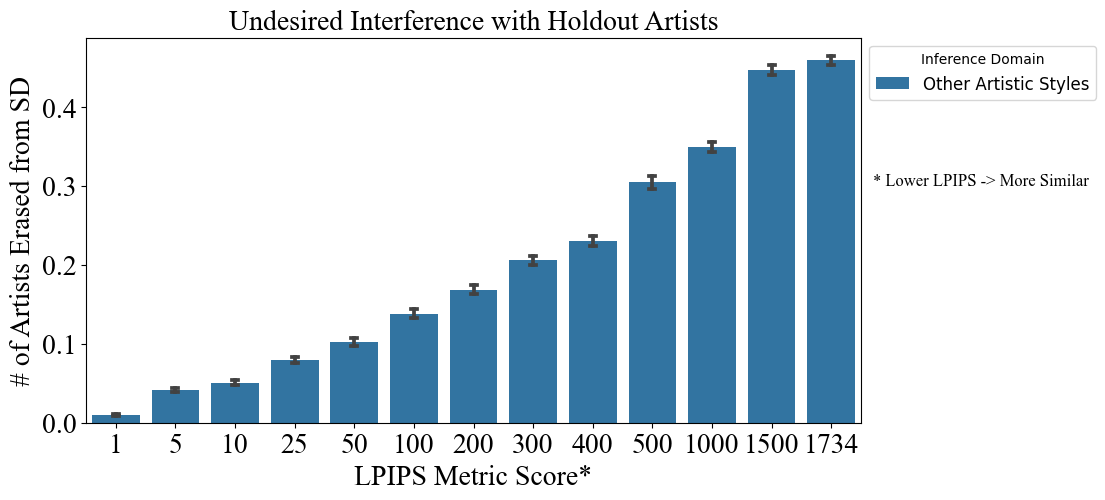

In [13]:
figure = plt.figure(figsize=(10,5))
ax = sns.barplot(data = df, x = 'Erased Artist', y = 'LPIPS Score', hue = 'Inference Domain', errorbar=('ci', 95), capsize=.1)
ax.set_ylabel('# of Artists Erased from SD', fontsize = 20, fontname="Times New Roman") # Y label
ax.set_xlabel('LPIPS Metric Score*', fontsize = 20, fontname="Times New Roman") # X label
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 12)
# plt.title('Style Erasure of ESD Compared to Original SD', fontsize = 15, fontname="Times New Roman")
plt.text(12.7,0.3,'* Lower LPIPS -> More Similar', fontname="Times New Roman",fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(20)
#         tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(20)
plt.title('Undesired Interference with Holdout Artists', fontsize = 20, fontname="Times New Roman")
# plt.savefig('/share/u/rohit/niche_artist_lpips.png', bbox_inches='tight')

In [37]:
 pd.pivot_table(df, values=['LPIPS Score'], index=['Erased Artist','Inference Domain'],
...                     aggfunc={'LPIPS Score': np.mean})

LPIPS Score
Erased Artist    Inference Domain                    
Ajin: Demi Human Intended Artistic Style     0.464981
                 Other Artistic Styles       0.148824
Kelly Mckernan   Intended Artistic Style     0.372103
                 Other Artistic Styles       0.212657
Kilian Eng       Intended Artistic Style     0.399778
                 Other Artistic Styles       0.229605
Thomas Kinkade   Intended Artistic Style     0.404264
                 Other Artistic Styles       0.218301
Tyler Edlin      Intended Artistic Style     0.343095
                 Other Artistic Styles       0.221788

In [12]:
 pd.pivot_table(df, values=['LPIPS Score'], index=['Erased Artist','Inference Domain'],
...                     aggfunc={'LPIPS Score': np.mean})

LPIPS Score
Erased Artist Inference Domain                    
Kilian Eng    Intended Artistic Style     0.452153
              Other Artistic Styles       0.195100